In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
# new_df = df.sample(50000,random_state=2)

In [ ]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [ ]:
df.isnull().sum()

,0
id,0
qid1,0
qid2,0
question1,1
question2,2
is_duplicate,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(404287, 6)

In [ ]:
import nltk
from nltk.stem import PorterStemmer
def preprocess(q):
    stemmer = PorterStemmer()
    q = str(q).lower().strip()

    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')

    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')

    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)

    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")

    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()

    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()

    # Stemming
    q = " ".join([stemmer.stem(word) for word in  q.split()])


    return q


In [ ]:
df['question1'] = df['question1'].apply(preprocess)
df['question2'] = df['question2'].apply(preprocess)

In [ ]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,what is the step by step guid to invest in sha...,what is the step by step guid to invest in sha...,0
1,1,3,4,what is the stori of kohinoor koh i noor diamond,what would happen if the indian govern stole t...,0
2,2,5,6,how can i increas the speed of my internet con...,how can internet speed be increas by hack thro...,0
3,3,7,8,whi am i mental veri lone how can i solv it,find the remaind when 23 24 math is divid by 2...,0
4,4,9,10,which one dissolv in water quikli sugar salt m...,which fish would surviv in salt water,0


In [ ]:
# Basic Featuring Engineering

In [ ]:
df['q1_num_words'] = df['question1'].apply(lambda row: len(row.split(" ")))
df['q2_num_words'] = df['question2'].apply(lambda row: len(row.split(" ")))
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_num_words,q2_num_words
0,0,1,2,what is the step by step guid to invest in sha...,what is the step by step guid to invest in sha...,0,14,12
1,1,3,4,what is the stori of kohinoor koh i noor diamond,what would happen if the indian govern stole t...,0,10,15
2,2,5,6,how can i increas the speed of my internet con...,how can internet speed be increas by hack thro...,0,14,10
3,3,7,8,whi am i mental veri lone how can i solv it,find the remaind when 23 24 math is divid by 2...,0,11,12
4,4,9,10,which one dissolv in water quikli sugar salt m...,which fish would surviv in salt water,0,13,7


In [ ]:
df['q1_len'] = df['question1'].str.len()
df['q2_len'] = df['question2'].str.len()

In [ ]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return len(w1 & w2)

In [ ]:
df['word_common'] = df.apply(common_words, axis=1)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_num_words,q2_num_words,q1_len,q2_len,word_common
0,0,1,2,what is the step by step guid to invest in sha...,what is the step by step guid to invest in sha...,0,14,12,64,55,11
1,1,3,4,what is the stori of kohinoor koh i noor diamond,what would happen if the indian govern stole t...,0,10,15,48,81,7
2,2,5,6,how can i increas the speed of my internet con...,how can internet speed be increas by hack thro...,0,14,10,66,52,5
3,3,7,8,whi am i mental veri lone how can i solv it,find the remaind when 23 24 math is divid by 2...,0,11,12,43,50,0
4,4,9,10,which one dissolv in water quikli sugar salt m...,which fish would surviv in salt water,0,13,7,70,37,4


In [ ]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return (len(w1) + len(w2))

In [ ]:
df['word_total'] = df.apply(total_words, axis=1)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_num_words,q2_num_words,q1_len,q2_len,word_common,word_total
0,0,1,2,what is the step by step guid to invest in sha...,what is the step by step guid to invest in sha...,0,14,12,64,55,11,23
1,1,3,4,what is the stori of kohinoor koh i noor diamond,what would happen if the indian govern stole t...,0,10,15,48,81,7,24
2,2,5,6,how can i increas the speed of my internet con...,how can internet speed be increas by hack thro...,0,14,10,66,52,5,24
3,3,7,8,whi am i mental veri lone how can i solv it,find the remaind when 23 24 math is divid by 2...,0,11,12,43,50,0,20
4,4,9,10,which one dissolv in water quikli sugar salt m...,which fish would surviv in salt water,0,13,7,70,37,4,20


In [ ]:
df['word_share'] = round(df['word_common']/df['word_total'],2)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_num_words,q2_num_words,q1_len,q2_len,word_common,word_total,word_share
0,0,1,2,what is the step by step guid to invest in sha...,what is the step by step guid to invest in sha...,0,14,12,64,55,11,23,0.48
1,1,3,4,what is the stori of kohinoor koh i noor diamond,what would happen if the indian govern stole t...,0,10,15,48,81,7,24,0.29
2,2,5,6,how can i increas the speed of my internet con...,how can internet speed be increas by hack thro...,0,14,10,66,52,5,24,0.21
3,3,7,8,whi am i mental veri lone how can i solv it,find the remaind when 23 24 math is divid by 2...,0,11,12,43,50,0,20,0.00
4,4,9,10,which one dissolv in water quikli sugar salt m...,which fish would surviv in salt water,0,13,7,70,37,4,20,0.20


In [ ]:
# Advance Features

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
def fetch_token_features(row):

    q1 = row['question1']
    q2 = row['question2']

    SAFE_DIV = 0.0001

    STOP_WORDS = stopwords.words("english")

    token_features = [0.0]*8

    # Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])

    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])

    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))

    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))

    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))


    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)

    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])

    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])

    return token_features



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
token_features = df.apply(fetch_token_features, axis=1)

df["cwc_min"]       = list(map(lambda x: x[0], token_features))
df["cwc_max"]       = list(map(lambda x: x[1], token_features))
df["csc_min"]       = list(map(lambda x: x[2], token_features))
df["csc_max"]       = list(map(lambda x: x[3], token_features))
df["ctc_min"]       = list(map(lambda x: x[4], token_features))
df["ctc_max"]       = list(map(lambda x: x[5], token_features))
df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
df["first_word_eq"] = list(map(lambda x: x[7], token_features))

In [ ]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_num_words,q2_num_words,q1_len,q2_len,...,word_total,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
0,0,1,2,what is the step by step guid to invest in sha...,what is the step by step guid to invest in sha...,0,14,12,64,55,...,23,0.48,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0
1,1,3,4,what is the stori of kohinoor koh i noor diamond,what would happen if the indian govern stole t...,0,10,15,48,81,...,24,0.29,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0
2,2,5,6,how can i increas the speed of my internet con...,how can internet speed be increas by hack thro...,0,14,10,66,52,...,24,0.21,0.599988,0.499992,0.399992,0.249997,0.499995,0.357140,0.0,1.0
3,3,7,8,whi am i mental veri lone how can i solv it,find the remaind when 23 24 math is divid by 2...,0,11,12,43,50,...,20,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
4,4,9,10,which one dissolv in water quikli sugar salt m...,which fish would surviv in salt water,0,13,7,70,37,...,20,0.20,0.399992,0.199998,0.999950,0.666644,0.571420,0.307690,0.0,1.0


In [ ]:
pip install Distance

In [ ]:
import distance

def fetch_length_features(row):

    q1 = row['question1']
    q2 = row['question2']

    length_features = [0.0]*3

    # Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features

    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))

    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2

    strs = list(distance.lcsubstrings(q1, q2))
    if strs:
     length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    else :
      length_features[2] = 0.0

    return length_features

In [ ]:
length_features = df.apply(fetch_length_features, axis=1)

df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
df['mean_len'] = list(map(lambda x: x[1], length_features))
df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))

In [ ]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_num_words,q2_num_words,q1_len,q2_len,...,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio
0,0,1,2,what is the step by step guid to invest in sha...,what is the step by step guid to invest in sha...,0,14,12,64,55,...,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0,2.0,13.0,0.982143
1,1,3,4,what is the stori of kohinoor koh i noor diamond,what would happen if the indian govern stole t...,0,10,15,48,81,...,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0,5.0,12.5,0.571429
2,2,5,6,how can i increas the speed of my internet con...,how can internet speed be increas by hack thro...,0,14,10,66,52,...,0.499992,0.399992,0.249997,0.499995,0.357140,0.0,1.0,4.0,12.0,0.188679
3,3,7,8,whi am i mental veri lone how can i solv it,find the remaind when 23 24 math is divid by 2...,0,11,12,43,50,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,11.5,0.045455
4,4,9,10,which one dissolv in water quikli sugar salt m...,which fish would surviv in salt water,0,13,7,70,37,...,0.199998,0.999950,0.666644,0.571420,0.307690,0.0,1.0,6.0,10.0,0.157895


In [ ]:
pip install fuzzywuzzy

In [ ]:
# Fuzzy Features
import fuzzywuzzy
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):

    q1 = row['question1']
    q2 = row['question2']

    fuzzy_features = [0.0]*4

    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [ ]:
fuzzy_features = df.apply(fetch_fuzzy_features, axis=1)

# Creating new feature columns for fuzzy features
df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

In [ ]:
df.shape

(404287, 28)

In [ ]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_num_words,q2_num_words,q1_len,q2_len,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
0,0,1,2,what is the step by step guid to invest in sha...,what is the step by step guid to invest in sha...,0,14,12,64,55,...,0.785709,0.0,1.0,2.0,13.0,0.982143,92,100,92,100
1,1,3,4,what is the stori of kohinoor koh i noor diamond,what would happen if the indian govern stole t...,0,10,15,48,81,...,0.466664,0.0,1.0,5.0,12.5,0.571429,67,71,65,86
2,2,5,6,how can i increas the speed of my internet con...,how can internet speed be increas by hack thro...,0,14,10,66,52,...,0.357140,0.0,1.0,4.0,12.0,0.188679,41,38,64,73
3,3,7,8,whi am i mental veri lone how can i solv it,find the remaind when 23 24 math is divid by 2...,0,11,12,43,50,...,0.000000,0.0,0.0,1.0,11.5,0.045455,22,26,28,31
4,4,9,10,which one dissolv in water quikli sugar salt m...,which fish would surviv in salt water,0,13,7,70,37,...,0.307690,0.0,1.0,6.0,10.0,0.157895,36,54,49,68


In [ ]:
# feature analyises

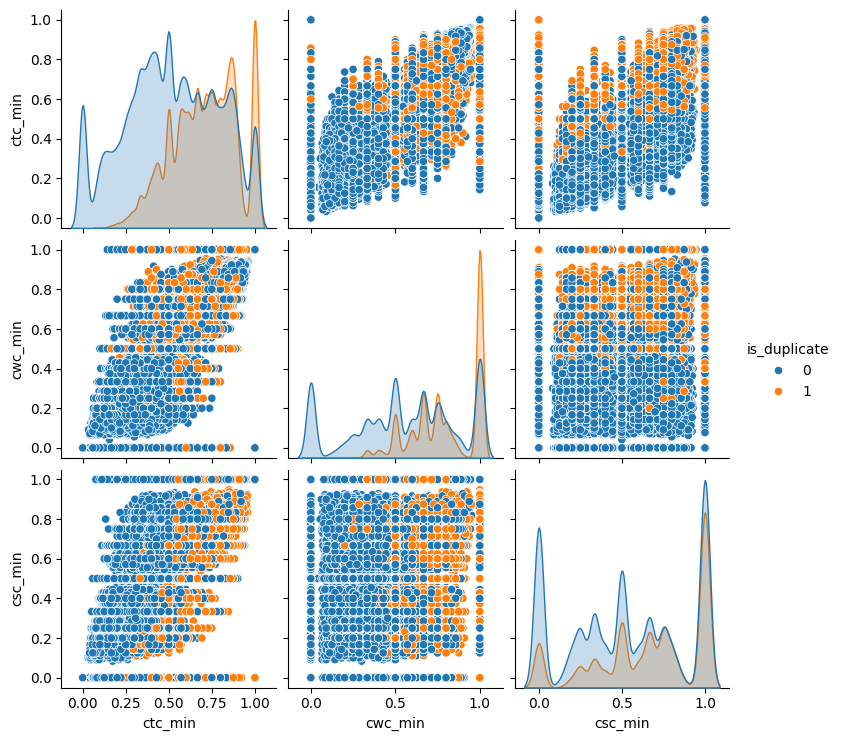

In [ ]:
sns.pairplot(df[['ctc_min', 'cwc_min', 'csc_min', 'is_duplicate']],hue='is_duplicate')

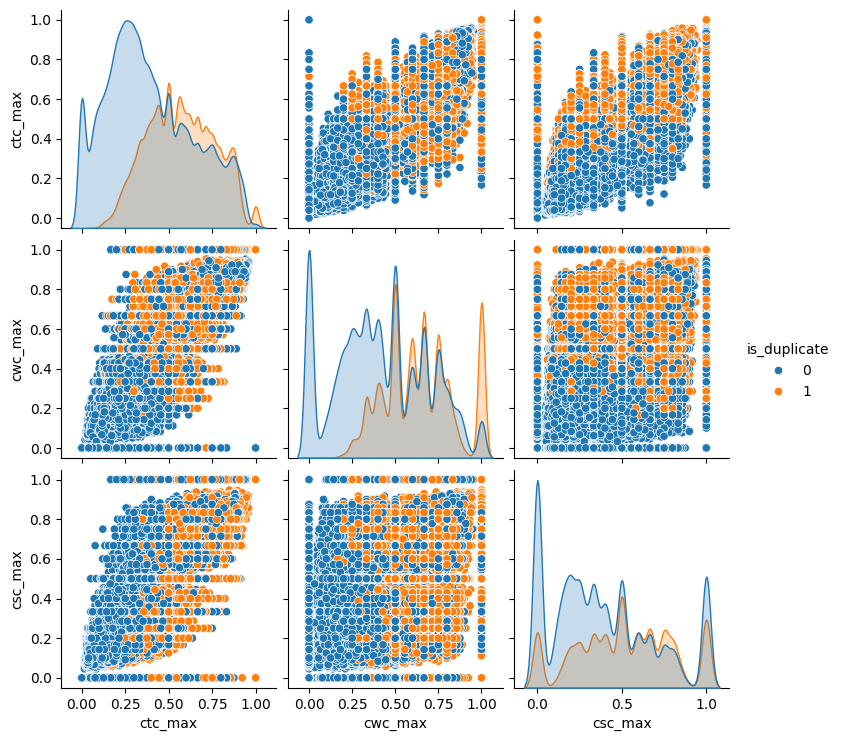

In [ ]:
sns.pairplot(df[['ctc_max', 'cwc_max', 'csc_max', 'is_duplicate']],hue='is_duplicate')

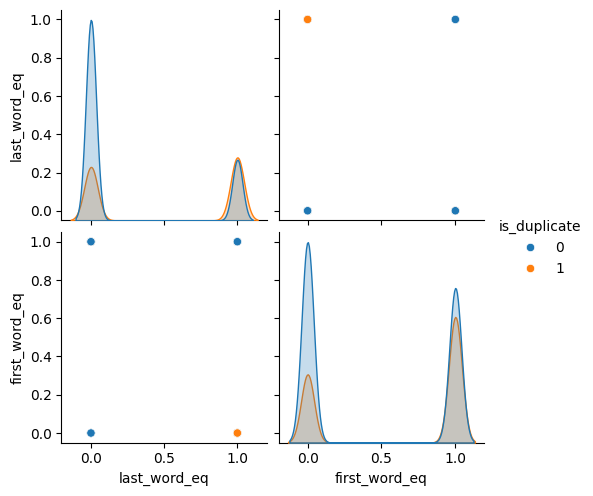

In [ ]:
sns.pairplot(df[['last_word_eq', 'first_word_eq', 'is_duplicate']],hue='is_duplicate')

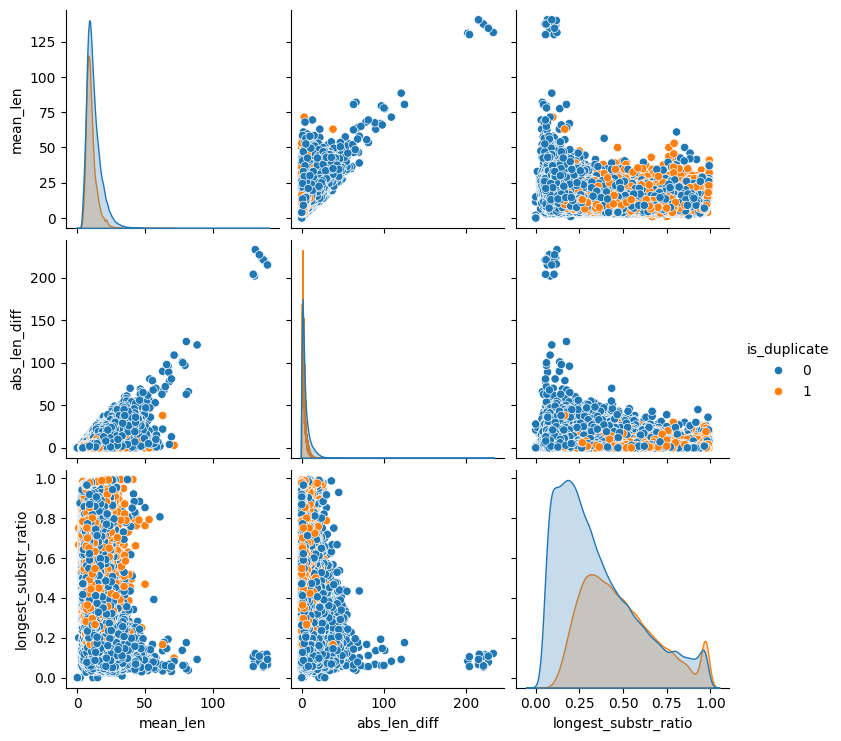

In [ ]:
sns.pairplot(df[['mean_len', 'abs_len_diff','longest_substr_ratio', 'is_duplicate']],hue='is_duplicate')

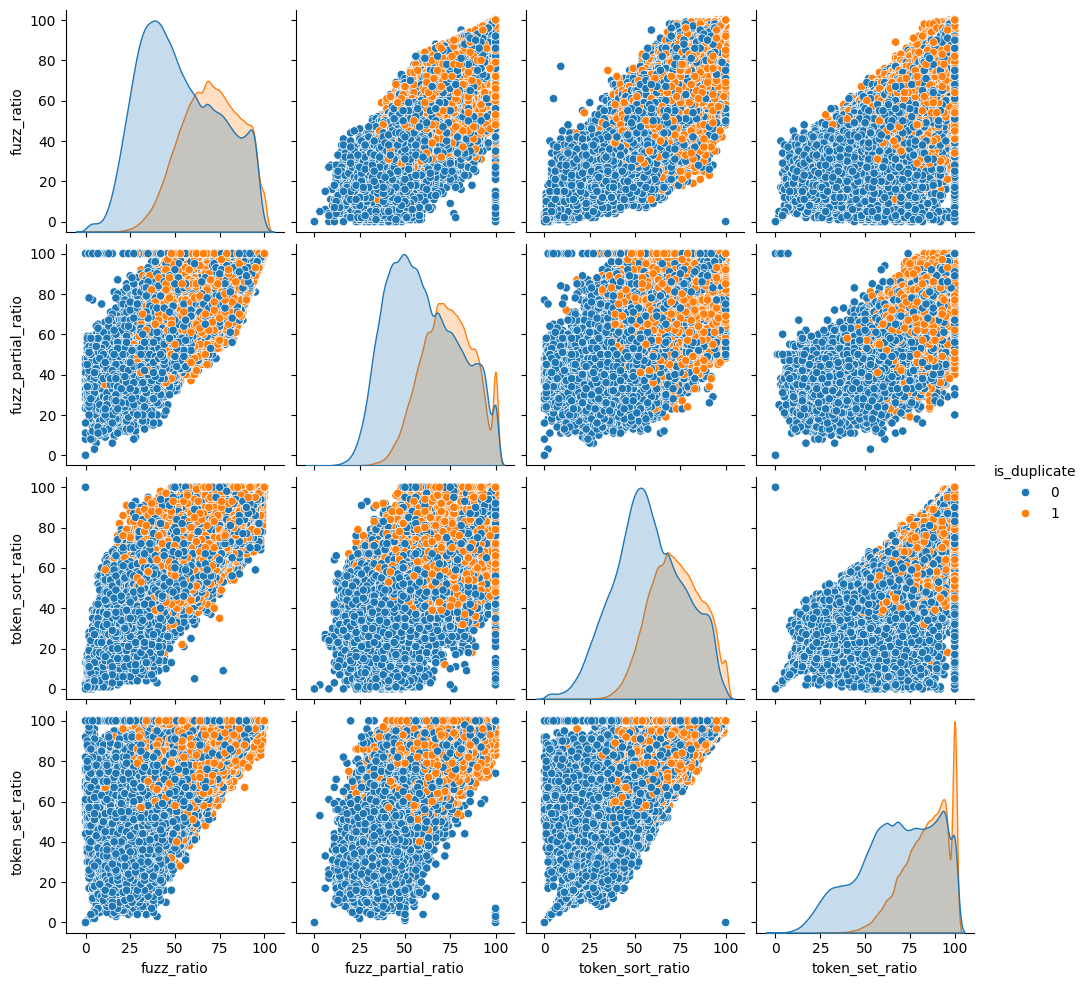

In [ ]:
sns.pairplot(df[['fuzz_ratio', 'fuzz_partial_ratio','token_sort_ratio','token_set_ratio', 'is_duplicate']],hue='is_duplicate')

In [ ]:
ques_df = df[['question1','question2']]
ques_df.head()

In [ ]:
final_df = df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(404287, 23)


,is_duplicate,q1_num_words,q2_num_words,q1_len,q2_len,word_common,word_total,word_share,cwc_min,cwc_max,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
0,0,14,12,64,55,11,23,0.48,0.999980,0.833319,...,0.785709,0.0,1.0,2.0,13.0,0.982143,92,100,92,100
1,0,10,15,48,81,7,24,0.29,0.799984,0.399996,...,0.466664,0.0,1.0,5.0,12.5,0.571429,67,71,65,86
2,0,14,10,66,52,5,24,0.21,0.599988,0.499992,...,0.357140,0.0,1.0,4.0,12.0,0.188679,41,38,64,73
3,0,11,12,43,50,0,20,0.00,0.000000,0.000000,...,0.000000,0.0,0.0,1.0,11.5,0.045455,22,26,28,31
4,0,13,7,70,37,4,20,0.20,0.399992,0.199998,...,0.307690,0.0,1.0,6.0,10.0,0.157895,36,54,49,68


In [ ]:
from gensim.models import Word2Vec

# Combine all questions
questions = list(ques_df['question1']) + list(ques_df['question2'])

# Preprocess and tokenize sentences (use your preprocess function if available)
tokenized_questions = [q.split() for q in questions]

# Train a Word2Vec model
w2v_model = Word2Vec(sentences=tokenized_questions, vector_size=30, window=5, min_count=1)

# Function to get the sentence vector by averaging word vectors
def get_sentence_vector(sentence, model):
    words = sentence.split()  # Tokenize the sentence
    word_vecs = [model.wv[word] for word in words if word in model.wv]
    if word_vecs:  # If the sentence contains words in the vocabulary
        return np.mean(word_vecs, axis=0)  # Average the word vectors
    else:
        return np.zeros(model.vector_size)  # Return a zero vector if no words match

# Convert questions to vectors
q1_arr = np.array([get_sentence_vector(q, w2v_model) for q in ques_df['question1']])
q2_arr = np.array([get_sentence_vector(q, w2v_model) for q in ques_df['question2']])

In [ ]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(404287, 60)

In [ ]:
final_df = pd.concat([final_df, temp_df], axis=1)
input_df = final_df.sample(50000, random_state=2);
print(input_df.shape)
input_df.head()

(50000, 83)


,is_duplicate,q1_num_words,q2_num_words,q1_len,q2_len,word_common,word_total,word_share,cwc_min,cwc_max,...,20,21,22,23,24,25,26,27,28,29
331535,1,5,8,25,43,2,13,0.15,0.999950,0.499988,...,0.701865,-0.701331,-1.396453,1.076602,0.217746,0.794665,-0.232536,1.493363,-0.648852,-0.070403
45407,1,5,7,29,39,4,12,0.33,0.666644,0.666644,...,0.212788,-0.430213,-1.664173,-0.273665,-0.345073,0.419346,-0.964583,0.338438,-0.740282,-1.322174
286200,0,3,6,17,36,3,9,0.33,0.999900,0.499975,...,-1.090744,-0.730568,-0.461392,0.323324,-1.018596,-0.285986,-1.719657,0.865872,-0.548011,-1.024496
157195,1,11,16,42,66,6,26,0.23,0.666656,0.571420,...,0.031794,-0.373310,-0.912062,-0.014275,-0.898166,0.837837,-1.396366,1.278239,0.029951,0.433139
154346,1,11,12,56,61,8,23,0.35,0.999975,0.799984,...,-0.541810,0.771595,-0.814925,1.480995,-0.673898,0.558576,-1.932208,1.160188,1.006639,1.650859


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(input_df.iloc[:,1:].values,input_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred1 = xgb.predict(X_test)
accuracy_score(y_test,y_pred1)

0.7955

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
# for random forest model
confusion_matrix(y_test,y_pred)

array([[5351,  932],
       [1103, 2614]])

In [ ]:
# for xgboost model
confusion_matrix(y_test,y_pred1)

array([[5327,  956],
       [1089, 2628]])

In [ ]:
# the 0-1 confusion matrix value in xgboost model is higher which infeasible so we perfer the random forst model

In [ ]:
def test_common_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))
    return len(w1 & w2)

In [ ]:
def test_total_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))
    return (len(w1) + len(w2))

In [ ]:
def test_fetch_token_features(q1,q2):

    SAFE_DIV = 0.0001

    STOP_WORDS = stopwords.words("english")

    token_features = [0.0]*8

    # Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])

    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])

    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))

    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))

    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))


    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)

    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])

    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    return token_features

In [ ]:
def test_fetch_length_features(q1,q2):

    length_features = [0.0]*3

    # Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features

    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))

    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2

    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)

    return length_features

In [ ]:
def test_fetch_fuzzy_features(q1,q2):

    fuzzy_features = [0.0]*4

    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [ ]:
def query_point_creator(q1, q2):
    input_query = []
    stemmer = PorterStemmer()

    # Preprocess
    q1 = preprocess(q1)
    q2 = preprocess(q2)

    # Fetch basic features
    input_query.append(len(q1))
    input_query.append(len(q2))
    input_query.append(len(q1.split(" ")))
    input_query.append(len(q2.split(" ")))
    input_query.append(test_common_words(q1, q2))
    input_query.append(test_total_words(q1, q2))
    input_query.append(round(test_common_words(q1, q2) / test_total_words(q1, q2), 2))

    # Fetch token features
    token_features = test_fetch_token_features(q1, q2)
    input_query.extend(token_features)

    # Fetch length-based features
    length_features = test_fetch_length_features(q1, q2)
    input_query.extend(length_features)

    # Fetch fuzzy features
    fuzzy_features = test_fetch_fuzzy_features(q1, q2)
    input_query.extend(fuzzy_features)

    # Stem words
    q1 = stemmer.stem(q1)
    q2 = stemmer.stem(q2)

    # Word2Vec sentence vectors
    q1_w2v = get_sentence_vector(q1, w2v_model).reshape(1, -1)  # Shape: (1, 300)
    q2_w2v = get_sentence_vector(q2, w2v_model).reshape(1, -1)  # Shape: (1, 300)

    # Concatenate all features
    input_query = np.array(input_query).reshape(1, -1)  # Shape: (1, 22)
    return np.hstack((input_query, q1_w2v, q2_w2v))  # Final shape: (1, 622)


In [ ]:
q1 = 'Where is the capital of India?'
q2 = 'What is the current capital of Pakistan?'
q3 = 'Which city serves as the capital of India?'
q4 = 'What is the business capital of India?'

In [ ]:
rf.predict(query_point_creator(q1,q4))

In [ ]:
# Downlaod the model and w2v_model for backend
# import pickle

# pickle.dump(rf,open('model.pkl','wb'))
# pickle.dump(w2v_model,open('w2v.pkl','wb'))